In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
df1 = pd.read_csv("accomodation_data.csv", encoding='iso-8859-1')
df2 = pd.read_csv("tourist_data.csv", encoding='iso-8859-1')

df = df1.merge(df2, on="Kuukausi")
df

,Kuukausi,"Liikkeet, lkm","Huoneet, lkm","Huonekäyttöaste, %",Huoneen keskihinta,"Vuoteet, lkm","Vuodekäyttöaste, %",Yöpymisen keskihinta,Suomi,Ulkomaat
0,1995M01,161,5069,28.9,48.45,13290,18.2,28.57,46170,29054
1,1995M02,176,5478,43.2,50.91,14248,33.0,24.96,98064,33950
2,1995M03,184,5582,51.7,55.18,14560,40.2,25.67,145824,41652
3,1995M04,191,5705,51.6,58.24,14924,43.5,24.56,189277,18343
4,1995M05,171,5234,19.4,43.04,13746,12.5,25.19,40813,9837
...,...,...,...,...,...,...,...,...,...,...
358,2024M11,175,8684,42.5,185.62,25199,30.8,90.08,66700,158618
359,2024M12,188,9375,77.3,272.62,26794,71.1,106.40,73519,522046
360,2025M01*,187,9410,67.4,230.04,27002,50.3,108.77,64170,361840
361,2025M02*,190,9383,78.0,230.12,26586,60.7,105.18,87034,372759


In [83]:
months = []
years = []

dates = df.iloc[:, [0]].values

for date in dates:
    year = date[0].split('M')[0]
    month = date[0].split('M')[1][:2]
    
    months.append(month)
    years.append(year)

df["Kuukausi"] = months
df["Vuosi"] = years
df

,Kuukausi,"Liikkeet, lkm","Huoneet, lkm","Huonekäyttöaste, %",Huoneen keskihinta,"Vuoteet, lkm","Vuodekäyttöaste, %",Yöpymisen keskihinta,Suomi,Ulkomaat,Vuosi
0,01,161,5069,28.9,48.45,13290,18.2,28.57,46170,29054,1995
1,02,176,5478,43.2,50.91,14248,33.0,24.96,98064,33950,1995
2,03,184,5582,51.7,55.18,14560,40.2,25.67,145824,41652,1995
3,04,191,5705,51.6,58.24,14924,43.5,24.56,189277,18343,1995
4,05,171,5234,19.4,43.04,13746,12.5,25.19,40813,9837,1995
...,...,...,...,...,...,...,...,...,...,...,...
358,11,175,8684,42.5,185.62,25199,30.8,90.08,66700,158618,2024
359,12,188,9375,77.3,272.62,26794,71.1,106.40,73519,522046,2024
360,01,187,9410,67.4,230.04,27002,50.3,108.77,64170,361840,2025
361,02,190,9383,78.0,230.12,26586,60.7,105.18,87034,372759,2025


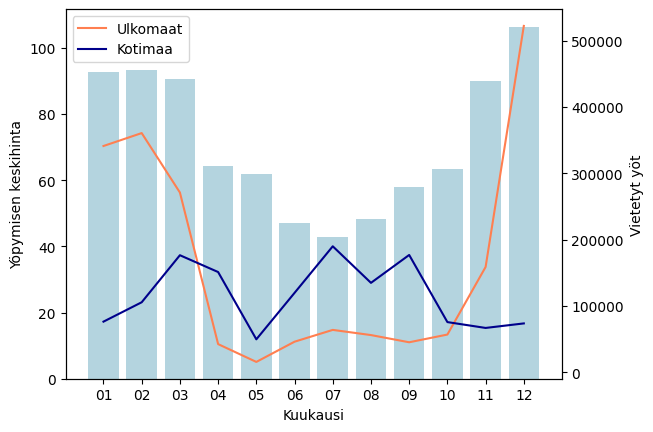

In [84]:
df_2024 = df.loc[df["Vuosi"] == "2024"]

fig, ax1 = plt.subplots()

sns.barplot(y="Yöpymisen keskihinta", x="Kuukausi",ax=ax1, data=df_2024, color="lightblue")

ax2 = ax1.twinx()

sns.lineplot(x="Kuukausi", y="Ulkomaat", data=df_2024, ax=ax2, color="coral", label="Ulkomaat", legend=False)

sns.lineplot(x="Kuukausi", y="Suomi", data=df_2024, ax=ax2, color="darkblue", label="Kotimaa")

ax2.set(ylabel='Vietetyt yöt')

plt.show()